# test_d25a.ipynb
Test functions contained in d25a.py.

Author: Benjamin S. Grandey

In [1]:
! date

Thu Sep 25 15:46:01 +08 2025


In [2]:
import d25a
from matplotlib import pyplot as plt
from scipy import stats

In [3]:
# Print package versions
print(d25a.get_watermark())

Python implementation: CPython
Python version       : 3.10.18
IPython version      : 8.37.0

matplotlib: 3.10.6
numpy     : 2.2.6
pandas    : 2.3.2
seaborn   : 0.13.2
xarray    : 2025.6.1

conda environment: d25a-rsl-fusion

Compiler    : Clang 18.1.8 
OS          : Darwin
Release     : 22.6.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit



In [4]:
# Gauge info
gauge_info = d25a.get_gauge_info(gauge='TANJONG_PAGAR')
gauge_info

{'gauge_name': 'TANJONG_PAGAR',
 'gauge_id': np.int64(1746),
 'lat': np.float64(1.27),
 'lon': np.float64(103.85),
 'country': 'SINGAPORE'}

In [5]:
# Cities within 120 km of the coast
cities_df = d25a.get_coastal_cities_df()
cities_df

,city_name,city_country,city_lat,city_lon,population_2025_1000s,coast_distance_km
city_index,,,,,,
5,Tiranë (Tirana),Albania,41.327500,19.818890,535.702,26
6,Annaba,Algeria,36.900000,7.766670,379.346,1
8,Blida,Algeria,36.480781,2.831943,535.641,22
9,El Djazaïr (Algiers),Algeria,36.752500,3.041970,3004.133,3
11,Qacentina,Algeria,36.354921,6.607293,426.746,65
...,...,...,...,...,...,...
1848,Adan (Aden),Yemen,12.798803,45.035902,1154.413,1
1849,Al-Hudaydah,Yemen,14.797810,42.954520,784.856,2
1850,Al-Mukalla,Yemen,14.542480,49.124240,650.728,2


In [6]:
# Total population across cities
population_df = d25a.get_total_population_df()
population_df

,All cities,Coastal cities,Large coastal cities
Count,1860,876,48
1950,0.419119,0.247211,0.103124
1955,0.488331,0.287053,0.121822
1960,0.573881,0.335784,0.143638
1965,0.666429,0.390295,0.16698
1970,0.770475,0.451357,0.191081
1975,0.877356,0.513557,0.214168
1980,1.000103,0.582331,0.237551
1985,1.129596,0.654039,0.26222
1990,1.287332,0.744185,0.293031


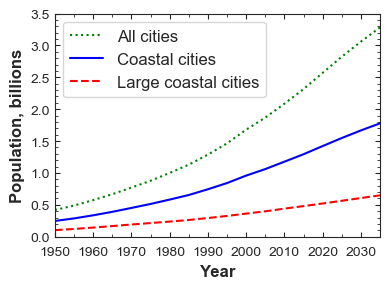

In [7]:
# Plot total population time series
fig, ax = d25a.fig_total_population_time_series()

In [8]:
# AR6 projections locations with (i) data AND (ii) a gauge or a coastal city.
coastal_loc_df = d25a.get_coastal_loc_df()
coastal_loc_df

,lat,lon
loc,,
1,48.38,-4.49
2,53.92,14.23
3,51.45,0.74
5,53.31,-4.62
7,53.87,8.72
...,...,...
1012803020,-38.00,-58.00
1012902870,-39.00,-73.00
1012902980,-39.00,-62.00


In [9]:
# Fusion under SSP5-8.5
qfs_da = d25a.get_sl_qfs(workflow='fusion_1e+2e', slr_str='rsl', scenario='ssp585')
qfs_da

<xarray.DataArray 'sea_level_change' (quantiles: 107, years: 9, locations: 1631)> Size: 13MB
array([[[-9.20000000e-02, -1.63000000e-01, -1.11000000e-01, ...,
         -6.40000000e-02, -6.00000000e-02, -5.10000000e-02],
        [-1.31000000e-01, -1.86000000e-01, -1.48000000e-01, ...,
         -7.40000000e-02, -1.80000000e-02, -2.30000000e-02],
        [-1.37000000e-01, -2.01000000e-01, -1.87000000e-01, ...,
         -9.80000000e-02, -3.70000000e-02, -3.50000000e-02],
        ...,
        [-2.45000000e-01, -2.51000000e-01, -2.65000000e-01, ...,
         -1.41000000e-01, -1.50000000e-02, -1.40000000e-02],
        [-2.51000000e-01, -2.58000000e-01, -2.58000000e-01, ...,
         -9.70000000e-02,  1.40000000e-02,  1.90000000e-02],
        [-3.25000000e-01, -3.87000000e-01, -3.42000000e-01, ...,
         -1.20000000e-01,  4.30000000e-02,  4.60000000e-02]],

       [[-4.79911765e-02, -8.89911765e-02, -5.39911765e-02, ...,
         -2.89882353e-02, -1.29941176e-02, -6.99117647e-03],
        [-6.38823529e-02, -8.89088235e-02, -6.88823529e-02, ...,
         -2.69735294e-02,  2.90235294e-02,  2.70176471e-02],
        [-5.27588235e-02, -8.08235294e-02, -7.47705882e-02, ...,
         -3.78617647e-02,  3.81382353e-02,  4.11294118e-02],
...
          2.10976176e+00,  2.44898529e+00,  2.39421176e+00],
        [ 2.98154706e+00,  2.92302059e+00,  3.02669412e+00, ...,
          2.85112647e+00,  3.26705882e+00,  3.20227941e+00],
        [ 3.92594118e+00,  3.83285000e+00,  3.93336471e+00, ...,
          3.73955882e+00,  4.34672059e+00,  4.24112059e+00]],

       [[ 2.45000000e-01,  2.99000000e-01,  2.78000000e-01, ...,
          1.54000000e-01,  2.26000000e-01,  2.19000000e-01],
        [ 4.28000000e-01,  4.79000000e-01,  4.69000000e-01, ...,
          4.15000000e-01,  4.46000000e-01,  4.42000000e-01],
        [ 6.63000000e-01,  6.90000000e-01,  7.04000000e-01, ...,
          7.45000000e-01,  8.04000000e-01,  7.92000000e-01],
        ...,
        [ 2.71900000e+00,  2.64600000e+00,  2.75500000e+00, ...,
          2.49500000e+00,  2.84100000e+00,  2.78600000e+00],
        [ 3.35100000e+00,  3.25800000e+00,  3.39100000e+00, ...,
          3.34700000e+00,  3.72500000e+00,  3.65300000e+00],
        [ 4.26900000e+00,  4.14700000e+00,  4.30000000e+00, ...,
          4.31400000e+00,  4.73400000e+00,  4.63000000e+00]]],
      shape=(107, 9, 1631))
Coordinates:
  * years      (years) int64 72B 2020 2030 2040 2050 2060 2070 2080 2090 2100
  * locations  (locations) int64 13kB 1 2 3 ... 1012902980 1013101750 1013401730
  * quantiles  (quantiles) float64 856B 0.0 0.001 0.005 0.01 ... 0.995 0.999 1.0
Attributes:
    units:    m

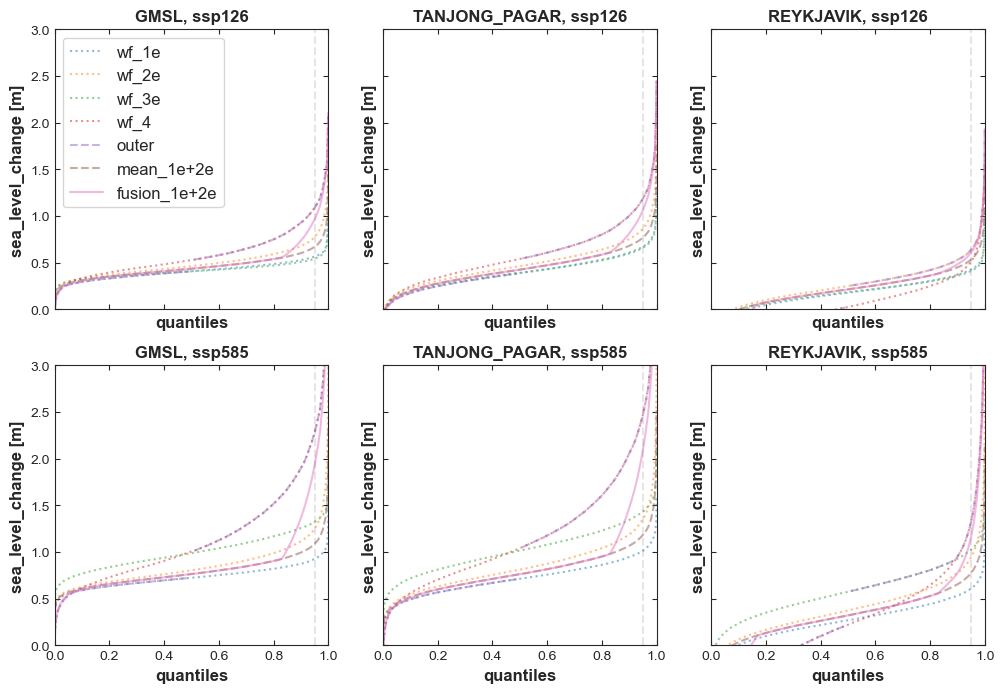

In [10]:
# Do fusion results look reasonable?
# Create subplot panels
fig, axs = plt.subplots(2, 3, figsize=(12, 8), sharex=True, sharey=True)
# Loop over locations, scenarios, and corresponding axes
for g, gauge in enumerate([None, 'TANJONG_PAGAR', 'REYKJAVIK']):
    for s, scenario in enumerate(['ssp126', 'ssp585']):
        ax = axs[s, g]
        # Loop over workflows
        for workflow in ['wf_1e', 'wf_2e', 'wf_3e', 'wf_4', 'outer', 'mean_1e+2e', 'fusion_1e+2e']:
            # Get data for 2100
            if gauge:  # RSL
                qfs_da = d25a.get_sl_qfs(workflow=workflow, slr_str='rsl', scenario=scenario).sel(years=2100)
                qfs_da = qfs_da.sel(locations=d25a.get_gauge_info(gauge=gauge)['gauge_id'])
            else:  # GMSL
                qfs_da = d25a.get_sl_qfs(workflow=workflow, slr_str='gmsl', scenario=scenario).sel(years=2100)
            # Plot data
            if 'wf' in workflow:
                linestyle = ':'
            elif workflow == 'fusion_1e+2e':
                linestyle = '-'
            else:
                linestyle = '--'
            qfs_da.plot(ax=ax, linestyle=linestyle, alpha=0.5, label=workflow)
        # Show 95th percentile
        ax.axvline(0.95, alpha=0.1, linestyle='--', color='k')
        # Customize title etc
        if gauge:
            ax.set_title(f'{gauge}, {scenario}')
        else:
            ax.set_title(f'GMSL, {scenario}')
        if g == 0 and s == 0:
            ax.legend()
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 3)

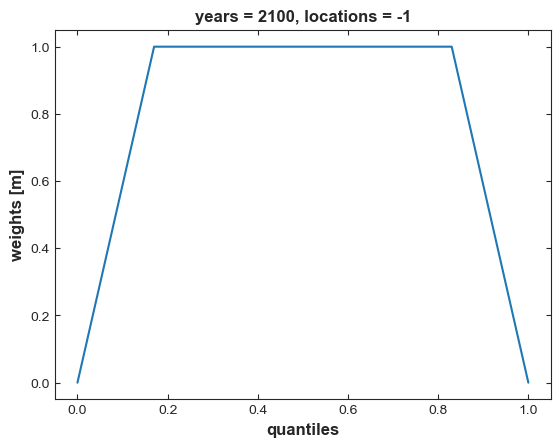

In [11]:
# Fusion weights
w_da = d25a.get_fusion_weights()
w_da.plot()

Skipping functions that write files:
`write_time_series_da()`,
`write_locations_info_df()`,
`write_year_2100_df()`

In [12]:
# Read sea-level projection time-series DataArray written by write_time_series_da()
time_series_da = d25a.read_time_series_da(slr_str='rsl', proj_str='fusion-ssp585')
time_series_da

Reading time_series/rsl_fusion-ssp585_d25a.nc


<xarray.DataArray 'sea_level_change' (quantiles: 107, years: 9, locations: 1631)> Size: 13MB
[1570653 values with dtype=float64]
Coordinates:
  * years      (years) int64 72B 2020 2030 2040 2050 2060 2070 2080 2090 2100
  * locations  (locations) int64 13kB 1 2 3 ... 1012902980 1013101750 1013401730
  * quantiles  (quantiles) float64 856B 0.0 0.001 0.005 0.01 ... 0.995 0.999 1.0
Attributes:
    units:    m

In [13]:
# Read locations information DataFrame written by write_locations_info_df().
locations_info_df = d25a.read_locations_info_df()
locations_info_df

Reading time_series/locations_info_d25a.csv


,lat,lon,gauge_id,gauge_name,gauge_country
location,,,,,
1,48.38,-4.49,1,BREST,FRANCE
2,53.92,14.23,2,SWINOUJSCIE,POLAND
3,51.45,0.74,3,SHEERNESS,UNITED KINGDOM
5,53.31,-4.62,5,HOLYHEAD,UNITED KINGDOM
7,53.87,8.72,7,CUXHAVEN_2,GERMANY
...,...,...,...,...,...
1012803020,-38.00,-58.00,<NA>,NaN,NaN
1012902870,-39.00,-73.00,<NA>,NaN,NaN
1012902980,-39.00,-62.00,<NA>,NaN,NaN


In [14]:
# Read year-2100 projections DataFrame written by write_year_2100_df().
year_2100_df = d25a.read_year_2100_df(slr_str='rsl', gauges_str='grid', cities_str='megacities')
year_2100_df

Reading year_2100/rsl_grid_megacities_2100_d25a.csv


,city_index,city_name,city_country,city_lat,city_lon,population_2025_1000s,coast_distance_km,city_short,city_region,location,lat,lon,low-end,low,central,high,high-end
0,19,Luanda,Angola,-8.84,13.23,10028,2,Luanda,Africa,1009900130,-9.0,13.0,0.18,0.32,0.62,1.10,2.16
1,24,Buenos Aires,Argentina,-34.61,-58.40,15752,3,Buenos Aires,South America,1012503020,-35.0,-58.0,0.20,0.28,0.51,0.89,1.85
2,59,Chittagong,Bangladesh,22.33,91.84,5653,6,Chittagong,South Asia,1006800920,22.0,92.0,-0.11,0.11,0.50,1.04,2.03
3,61,Dhaka,Bangladesh,23.71,90.41,24653,109,Dhaka,South Asia,1006600900,24.0,90.0,-0.13,0.09,0.48,1.01,1.98
4,134,Rio de Janeiro,Brazil,-22.90,-43.21,13923,1,Rio de Janeiro,South America,1011303170,-23.0,-43.0,0.22,0.32,0.57,0.98,2.03
5,236,Dalian,China,38.91,121.60,6347,2,Dalian,East Asia,1005101220,39.0,122.0,-0.09,0.13,0.54,1.13,2.14
6,251,Dongguan,China,23.02,113.74,7773,13,Dongguan,East Asia,1006701140,23.0,114.0,-0.08,0.14,0.56,1.09,2.12
7,264,Foshan,China,23.02,113.12,7817,27,Foshan,East Asia,1006701130,23.0,113.0,-0.09,0.13,0.55,1.08,2.11
8,283,"Guangzhou, Guangdong",China,23.13,113.26,14879,12,Guangzhou,East Asia,1006701130,23.0,113.0,-0.09,0.13,0.55,1.08,2.11
9,298,Hangzhou,China,30.29,120.16,8591,7,Hangzhou,East Asia,1006001200,30.0,120.0,-0.09,0.13,0.54,1.11,2.14


In [15]:
# Contribution of VLM to year-2100 projections
year_2100_df = d25a.read_year_2100_df(slr_str='vlm', gauges_str='grid', cities_str='megacities')
year_2100_df

Reading year_2100/rsl_grid_megacities_2100_d25a.csv
Reading year_2100/novlm_grid_megacities_2100_d25a.csv


,city_index,city_name,city_country,city_lat,city_lon,population_2025_1000s,coast_distance_km,city_short,city_region,location,lat,lon,low-end,low,central,high,high-end
0,19,Luanda,Angola,-8.84,13.23,10028,2,Luanda,Africa,1009900130,-9.0,13.0,-0.10,-0.05,0.00,0.03,0.01
1,24,Buenos Aires,Argentina,-34.61,-58.40,15752,3,Buenos Aires,South America,1012503020,-35.0,-58.0,-0.01,-0.01,-0.01,0.00,0.00
2,59,Chittagong,Bangladesh,22.33,91.84,5653,6,Chittagong,South Asia,1006800920,22.0,92.0,-0.30,-0.18,-0.02,0.11,0.06
3,61,Dhaka,Bangladesh,23.71,90.41,24653,109,Dhaka,South Asia,1006600900,24.0,90.0,-0.30,-0.19,-0.02,0.10,0.06
4,134,Rio de Janeiro,Brazil,-22.90,-43.21,13923,1,Rio de Janeiro,South America,1011303170,-23.0,-43.0,-0.03,-0.02,-0.01,0.00,-0.01
5,236,Dalian,China,38.91,121.60,6347,2,Dalian,East Asia,1005101220,39.0,122.0,-0.31,-0.19,-0.02,0.11,0.06
6,251,Dongguan,China,23.02,113.74,7773,13,Dongguan,East Asia,1006701140,23.0,114.0,-0.31,-0.19,-0.02,0.11,0.07
7,264,Foshan,China,23.02,113.12,7817,27,Foshan,East Asia,1006701130,23.0,113.0,-0.32,-0.20,-0.03,0.11,0.07
8,283,"Guangzhou, Guangdong",China,23.13,113.26,14879,12,Guangzhou,East Asia,1006701130,23.0,113.0,-0.32,-0.20,-0.03,0.11,0.07
9,298,Hangzhou,China,30.29,120.16,8591,7,Hangzhou,East Asia,1006001200,30.0,120.0,-0.33,-0.20,-0.03,0.10,0.06


In [16]:
# Summary statistics
for slr_str in ['rsl', 'novlm']:
    for gauges_str in ['gauges', 'grid']:
        for cities_str in [None, 'cities', 'megacities']:
            print(slr_str, gauges_str, cities_str)
            summary_df = d25a.get_year_2100_summary_df(slr_str=slr_str, gauges_str=gauges_str, cities_str=cities_str)
            print(summary_df)
            print()

rsl gauges None
Reading year_2100/rsl_gauges_2100_d25a.csv
Reading time_series/gmsl_low-end_d25a.nc
Reading time_series/gmsl_low_d25a.nc
Reading time_series/gmsl_central_d25a.nc
Reading time_series/gmsl_high_d25a.nc
Reading time_series/gmsl_high-end_d25a.nc
                                          low-end          low      central  \
Median, m                                     0.2          0.3          0.6   
IQR, m                                 0.1 to 0.3   0.2 to 0.4   0.5 to 0.6   
Range, m                              -1.9 to 2.0  -1.7 to 2.1  -1.5 to 2.4   
Count                                        1016         1016         1016   
Proportion above GMSL rise, %                  20           32           53   
Correlation with high-end projection         0.94         0.93         0.93   

                                             high     high-end  
Median, m                                     1.0          2.0  
IQR, m                                 0.9 to 1.1   1.8 to

In [17]:
# Country stats
d25a.get_country_stats_df(slr_str='rsl',  min_count=4)

Reading year_2100/rsl_gauges_2100_d25a.csv


,index,gauge_country,country,count,low-end_med,low-end_min,low-end_max,low_med,low_min,low_max,central_med,central_min,central_max,high_med,high_min,high_max,high-end_med,high-end_min,high-end_max
0,27,FINLAND,Finland,24.0,-0.480,-0.78,-0.15,-0.320,-0.60,-0.00,-0.020,-0.29,0.30,0.405,0.13,0.74,1.185,0.89,1.52
1,112,ÅLAND ISLANDS,Åland Islands,4.0,-0.415,-0.46,-0.40,-0.260,-0.30,-0.24,0.035,-0.00,0.06,0.465,0.42,0.49,1.255,1.21,1.28
2,73,NORWAY,Norway,26.0,-0.225,-0.38,-0.01,-0.010,-0.15,0.18,0.290,0.14,0.48,0.690,0.55,0.91,1.430,1.27,1.70
3,96,SWEDEN,Sweden,33.0,-0.140,-0.83,0.10,0.010,-0.64,0.24,0.290,-0.33,0.55,0.710,0.08,0.95,1.500,0.84,1.76
4,18,CROATIA,Croatia,7.0,0.110,0.09,0.15,0.230,0.21,0.26,0.470,0.45,0.51,0.860,0.84,0.92,1.740,1.71,1.80
5,12,CHILE,Chile,13.0,0.080,-0.04,0.27,0.170,0.06,0.36,0.380,0.26,0.58,0.740,0.57,0.95,1.750,1.31,1.95
6,104,UNITED KINGDOM,United Kingdom,43.0,0.110,-0.08,0.19,0.260,0.12,0.36,0.540,0.39,0.66,0.930,0.78,1.08,1.770,1.58,1.90
7,9,CANADA,Canada,37.0,0.060,-0.87,0.39,0.170,-0.70,0.55,0.420,-0.39,0.87,0.800,0.19,1.34,1.770,1.03,2.27
8,20,DENMARK,Denmark,15.0,0.100,-0.01,0.16,0.260,0.15,0.30,0.560,0.43,0.64,0.980,0.86,1.08,1.790,1.66,1.88
9,46,ITALY,Italy,11.0,0.150,0.11,0.23,0.260,0.22,0.35,0.510,0.48,0.59,0.910,0.87,0.98,1.810,1.73,1.89


In [18]:
# Table showing GMSL and probability of exceeding each projection
gmsl_df = d25a.get_gmsl_df()
gmsl_df

Reading time_series/gmsl_high-end_d25a.nc
Reading time_series/gmsl_high_d25a.nc
Reading time_series/gmsl_central_d25a.nc
Reading time_series/gmsl_low_d25a.nc
Reading time_series/gmsl_low-end_d25a.nc
Reading time_series/gmsl_fusion-ssp126_d25a.nc
Reading time_series/gmsl_fusion-ssp585_d25a.nc
Reading time_series/gmsl_fusion-ssp126_d25a.nc
Reading time_series/gmsl_fusion-ssp585_d25a.nc
Reading time_series/gmsl_fusion-ssp126_d25a.nc
Reading time_series/gmsl_fusion-ssp585_d25a.nc
Reading time_series/gmsl_fusion-ssp126_d25a.nc
Reading time_series/gmsl_fusion-ssp585_d25a.nc
Reading time_series/gmsl_fusion-ssp126_d25a.nc
Reading time_series/gmsl_fusion-ssp585_d25a.nc


,definition,gmsl_2100,p_ssp126,p_ssp585
high-end,95th %ile under SSP5-8.5,1.930706,0.138,5.000
high,83rd %ile under SSP5-8.5,0.927000,5.698,17.000
central,50th %ile under SSP2-4.5,0.556000,16.976,94.508
low,17th %ile under SSP1-2.6,0.343000,83.000,99.185
low-end,5th %ile under SSP1-2.6,0.270000,95.000,99.592


Called fig_fusion_time_series(gmsl, None, None)
Reading time_series/gmsl_fusion-ssp585_d25a.nc
Reading time_series/gmsl_central_d25a.nc
Reading time_series/gmsl_high_d25a.nc
Reading time_series/gmsl_high-end_d25a.nc
Reading time_series/gmsl_fusion-ssp126_d25a.nc
Reading time_series/gmsl_central_d25a.nc
Reading time_series/gmsl_low_d25a.nc
Reading time_series/gmsl_low-end_d25a.nc
Called fig_fusion_time_series(rsl, grid, Singapore)
Reading time_series/rsl_fusion-ssp585_d25a.nc
Reading year_2100/rsl_grid_cities_2100_d25a.csv
City is Singapore, location is 1008901040
Reading time_series/rsl_central_d25a.nc
Reading time_series/rsl_high_d25a.nc
Reading time_series/rsl_high-end_d25a.nc
Reading time_series/rsl_fusion-ssp126_d25a.nc
Reading year_2100/rsl_grid_cities_2100_d25a.csv
Reading time_series/rsl_central_d25a.nc
Reading time_series/rsl_low_d25a.nc
Reading time_series/rsl_low-end_d25a.nc
Called fig_fusion_time_series(rsl, grid, Bangkok)
Reading time_series/rsl_fusion-ssp585_d25a.nc
Readin

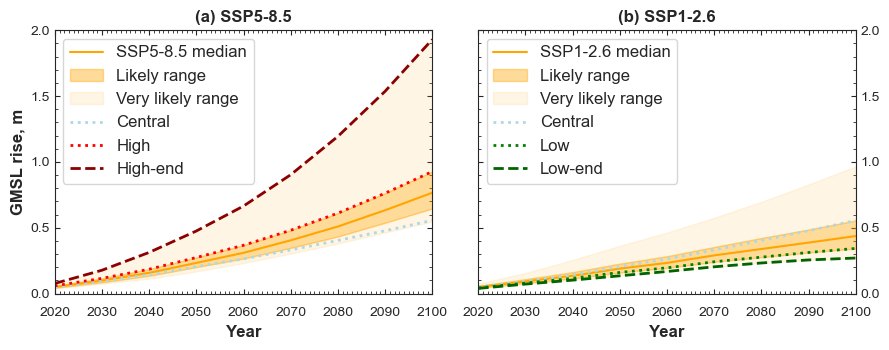

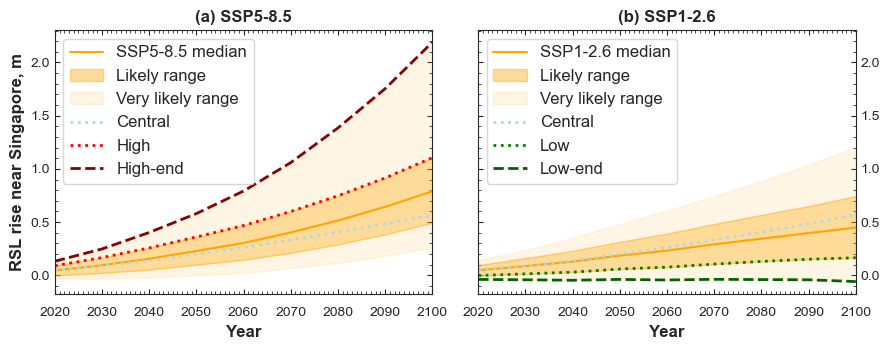

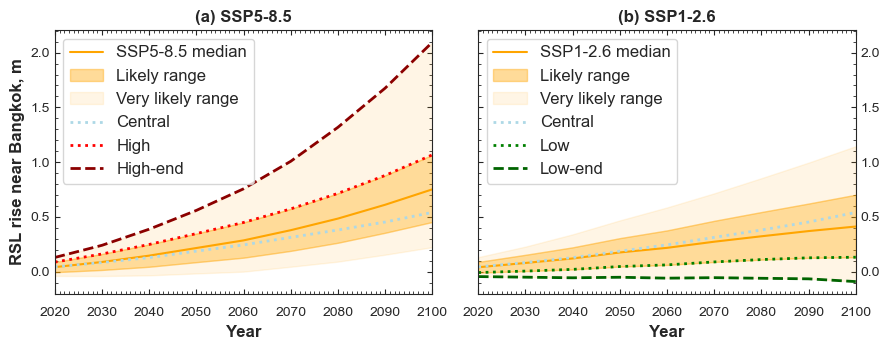

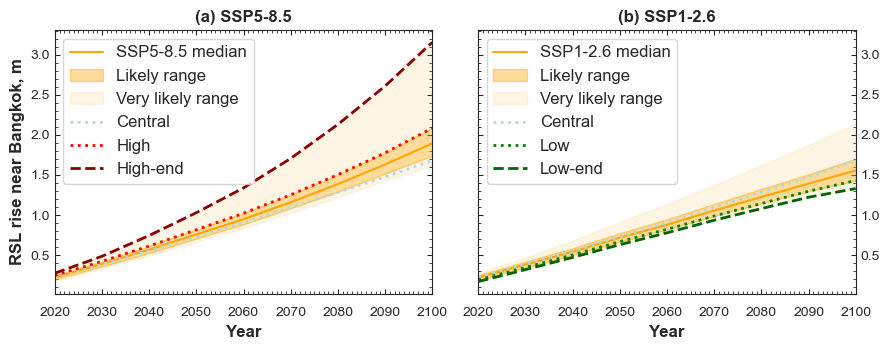

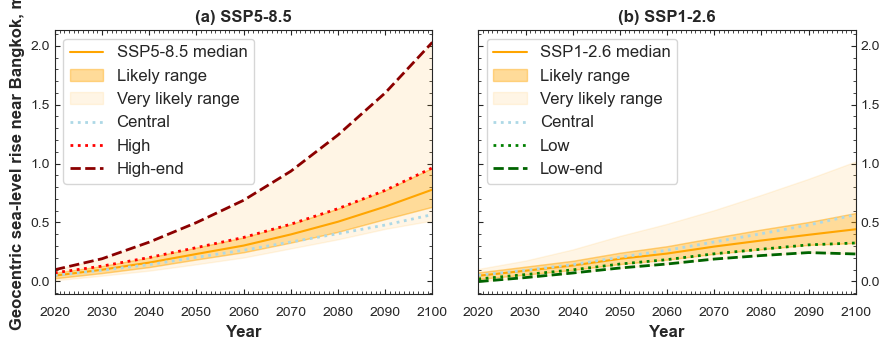

In [19]:
# Plot fusion time series
fig, axs = d25a.fig_fusion_time_series(slr_str='gmsl', gauges_str=None, loc_str=None)
fig, axs = d25a.fig_fusion_time_series(slr_str='rsl', gauges_str='grid', loc_str='Singapore')
fig, axs = d25a.fig_fusion_time_series(slr_str='rsl', gauges_str='grid', loc_str='Bangkok')
fig, axs = d25a.fig_fusion_time_series(slr_str='rsl', gauges_str='gauges', loc_str='Bangkok')
fig, axs = d25a.fig_fusion_time_series(slr_str='novlm', gauges_str='grid', loc_str='Bangkok')

Reading year_2100/rsl_grid_2100_d25a.csv
Plotting projection for 615 locations.
Reading year_2100/rsl_grid_megacities_2100_d25a.csv
Reading year_2100/rsl_grid_2100_d25a.csv
Plotting projection for 615 locations.
Reading year_2100/rsl_grid_megacities_2100_d25a.csv
Reading year_2100/novlm_grid_2100_d25a.csv
Plotting projection for 615 locations.
Reading year_2100/novlm_grid_megacities_2100_d25a.csv
Reading year_2100/rsl_grid_2100_d25a.csv
Reading year_2100/novlm_grid_2100_d25a.csv
Plotting projection for 615 locations.
Reading year_2100/rsl_grid_megacities_2100_d25a.csv
Reading year_2100/novlm_grid_megacities_2100_d25a.csv
Reading year_2100/rsl_gauges_2100_d25a.csv
Plotting projection for 1016 locations.


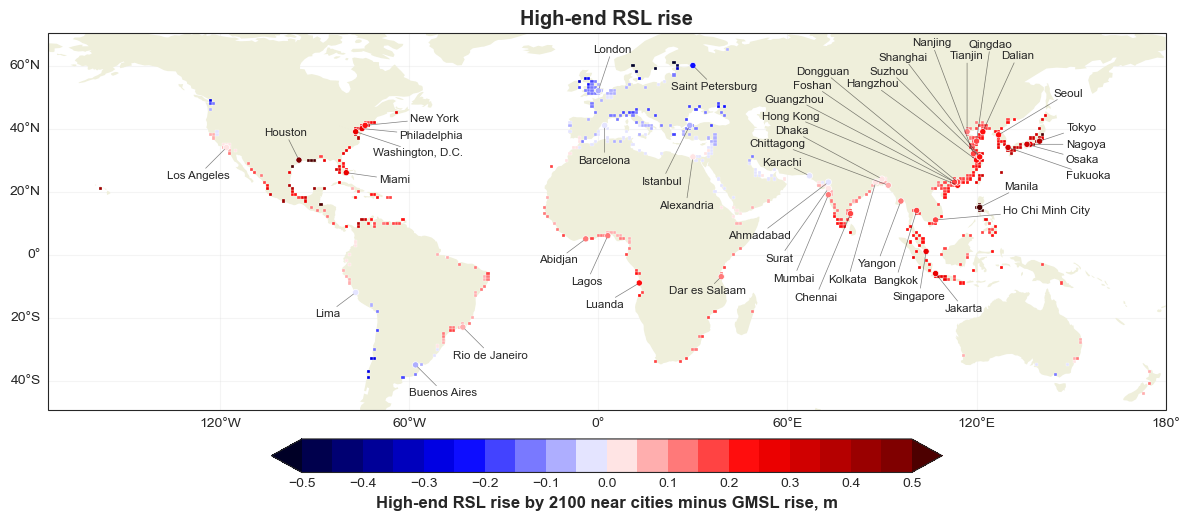

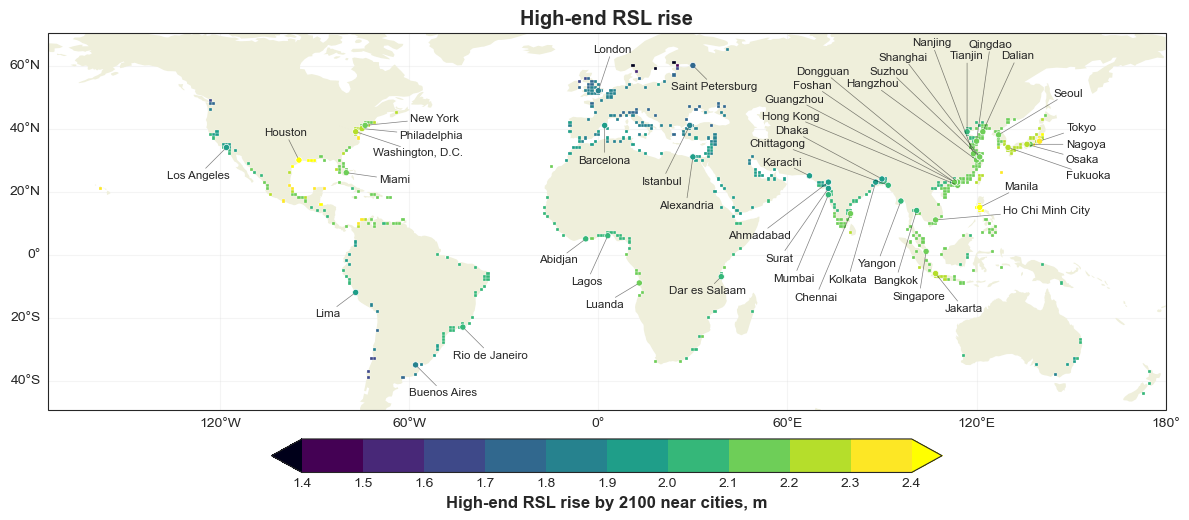

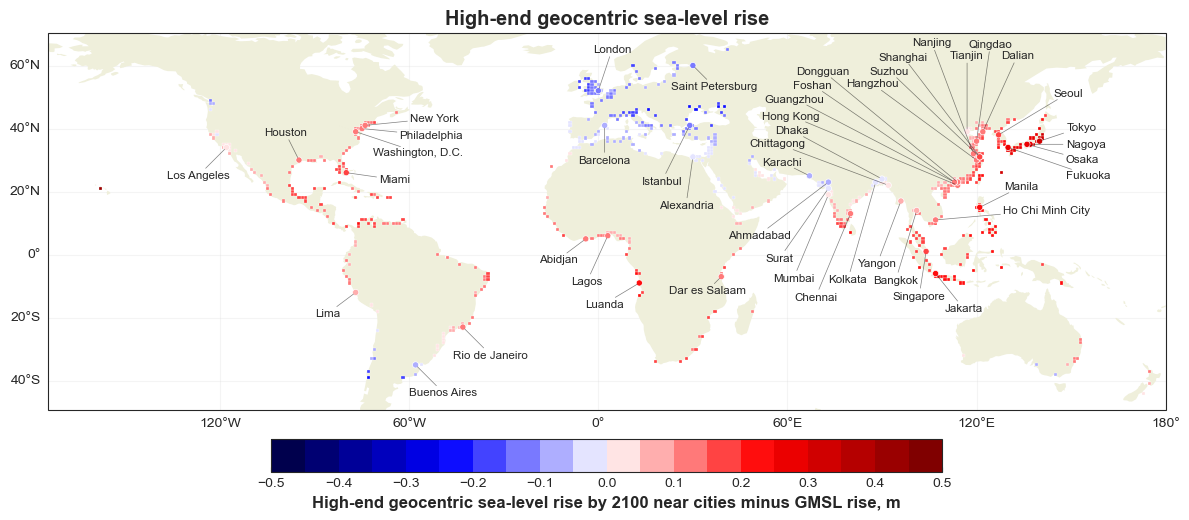

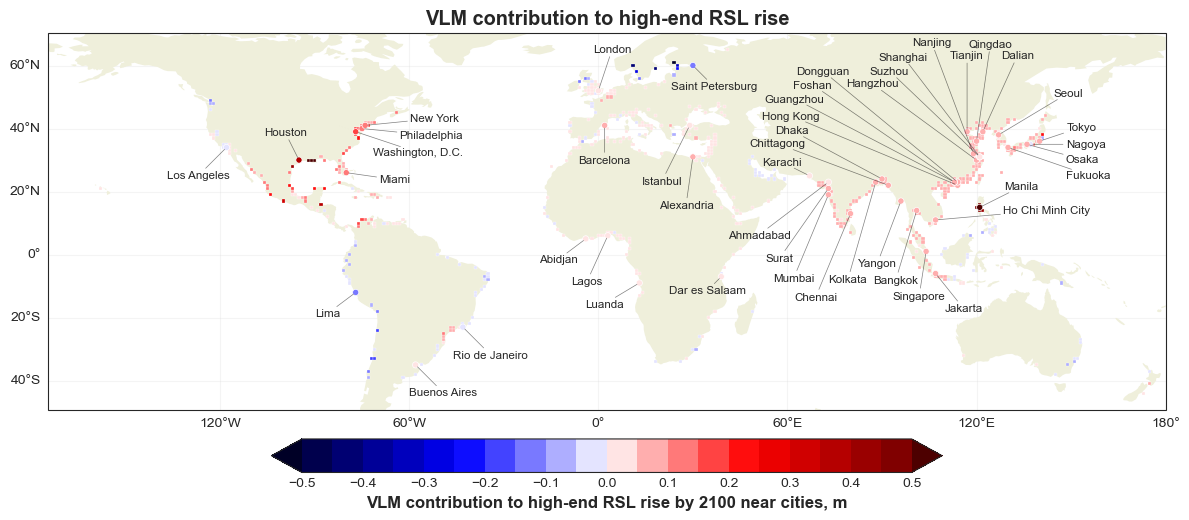

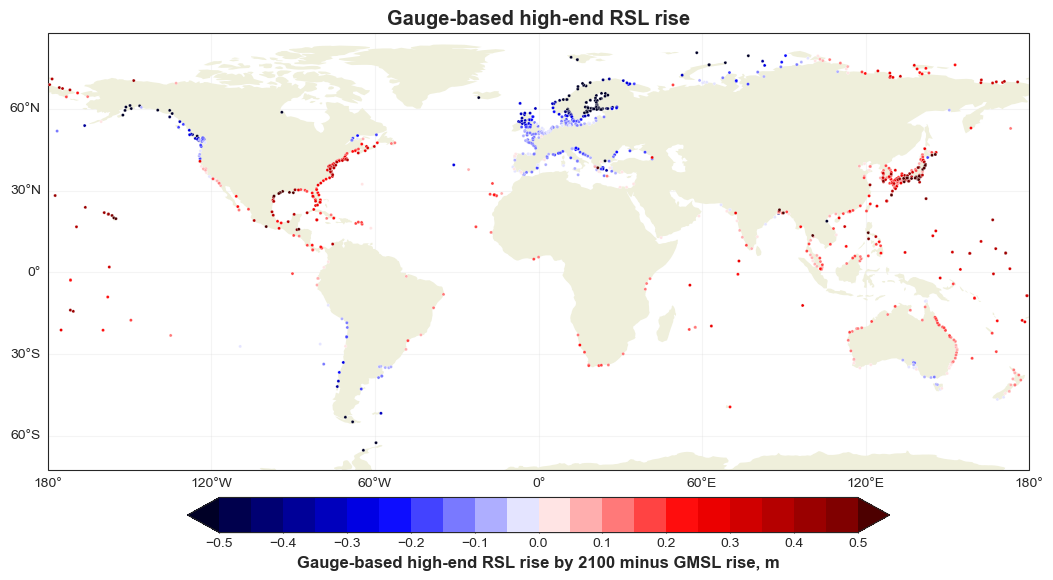

In [20]:
# Map of high-end projection
fig, ax = d25a.fig_year_2100_map(slr_str='rsl', gauges_str='grid')
fig, ax = d25a.fig_year_2100_map(slr_str='rsl', gauges_str='grid', diff=False, vmin=1.4, vmax=2.4)
fig, ax = d25a.fig_year_2100_map(slr_str='novlm', gauges_str='grid')
fig, ax = d25a.fig_year_2100_map(slr_str='vlm', gauges_str='grid', diff=False)
fig, ax = d25a.fig_year_2100_map(slr_str='rsl', gauges_str='gauges')

Reading year_2100/rsl_grid_megacities_2100_d25a.csv
Reading time_series/gmsl_high-end_d25a.nc
Reading year_2100/novlm_grid_megacities_2100_d25a.csv
Reading time_series/gmsl_high-end_d25a.nc


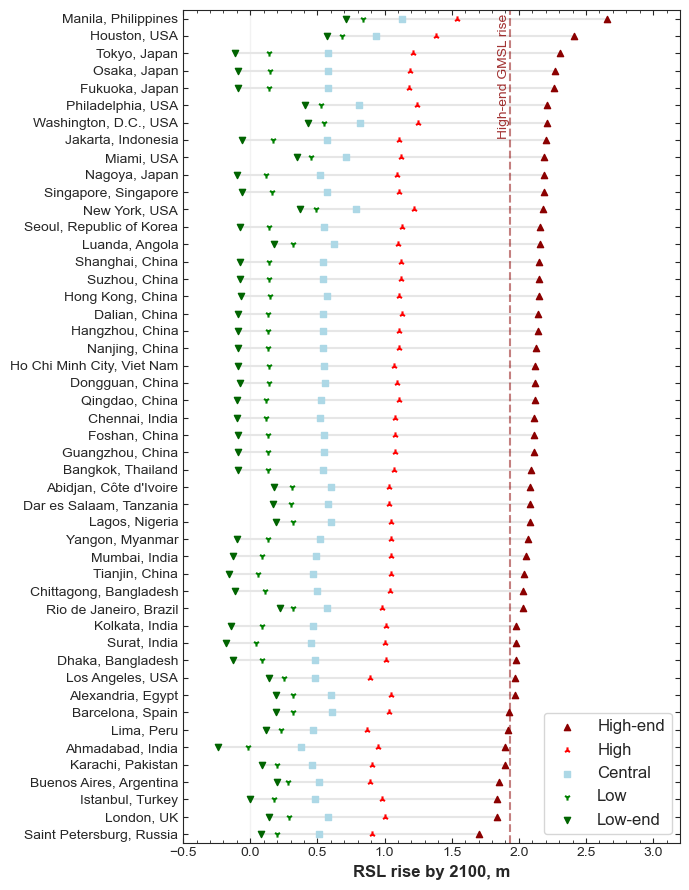

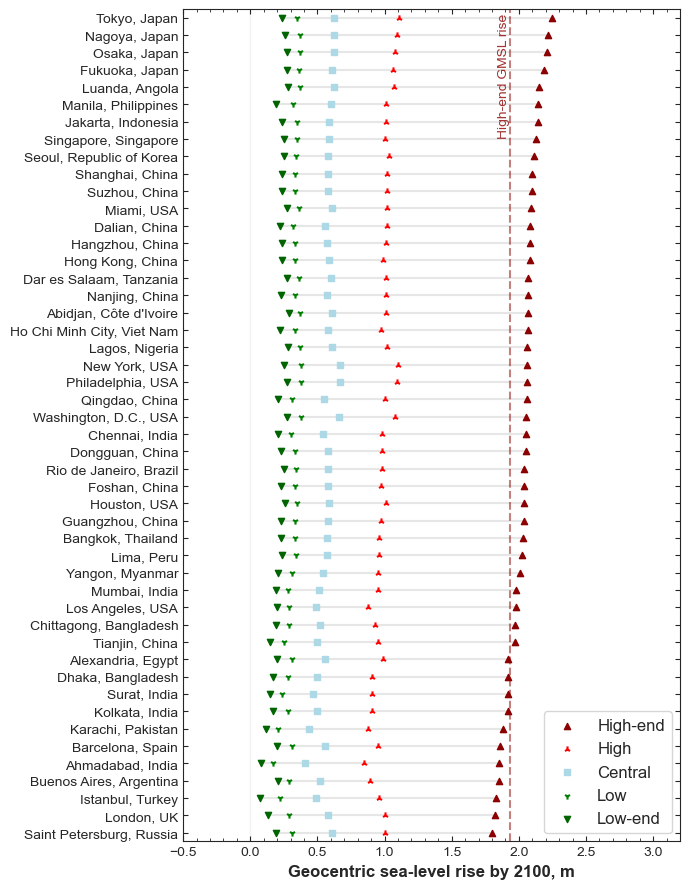

In [21]:
# Plot SLR projections for megacities
fig, ax = d25a.fig_year_2100_megacities(slr_str='rsl')
fig, ax = d25a.fig_year_2100_megacities(slr_str='novlm')

Reading year_2100/novlm_grid_megacities_2100_d25a.csv
Reading year_2100/rsl_grid_megacities_2100_d25a.csv
Reading year_2100/rsl_grid_megacities_2100_d25a.csv
Reading year_2100/rsl_gauges_megacities_2100_d25a.csv
Reading year_2100/rsl_grid_megacities_2100_d25a.csv
Reading year_2100/rsl_grid_megacities_2100_d25a.csv
Reading year_2100/novlm_grid_cities_2100_d25a.csv
Reading year_2100/rsl_grid_cities_2100_d25a.csv
Reading year_2100/rsl_grid_cities_2100_d25a.csv
Reading year_2100/rsl_gauges_cities_2100_d25a.csv
Reading year_2100/rsl_grid_cities_2100_d25a.csv
Reading year_2100/rsl_grid_cities_2100_d25a.csv
Reading year_2100/novlm_grid_2100_d25a.csv
Reading year_2100/rsl_grid_2100_d25a.csv
Reading year_2100/rsl_grid_2100_d25a.csv
Reading year_2100/rsl_gauges_2100_d25a.csv
fig_y_vs_x(high-end, grid, rsl, high-end, gauges, rsl, None): no data to plot.
Reading year_2100/rsl_grid_2100_d25a.csv
Reading year_2100/rsl_grid_2100_d25a.csv


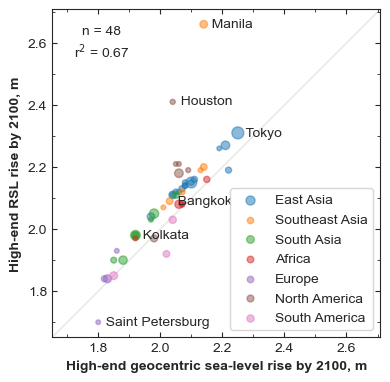

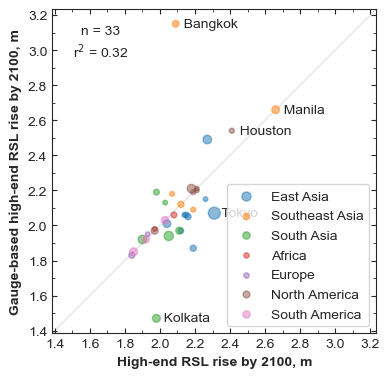

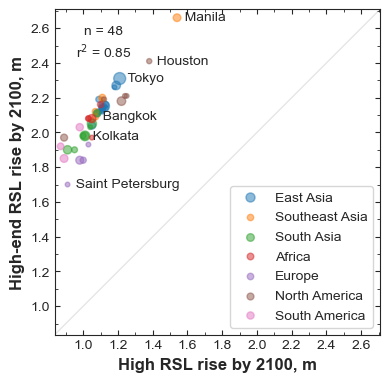

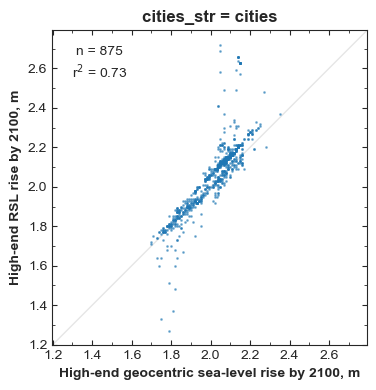

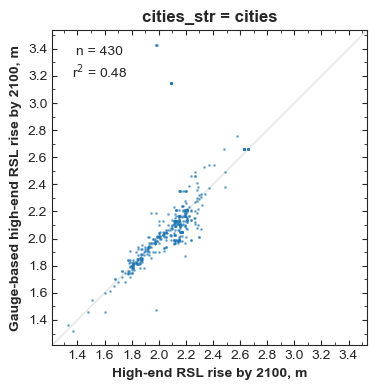

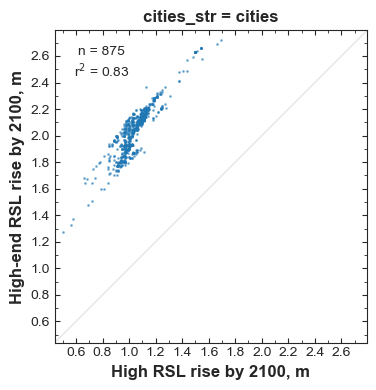

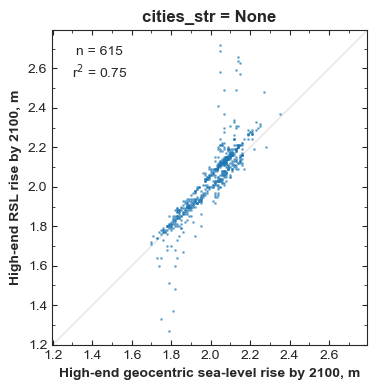

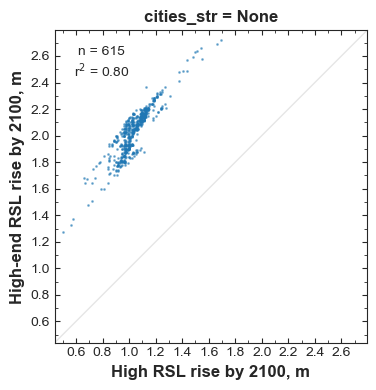

In [22]:
# Plot y vs x with (i) RSL vs geocentric, (ii) gauge-based vs grid-box RSL, (iii) high-end vs high
cities_to_label = ('Tokyo', 'Manila', 'Houston', 'Saint Petersburg', 'Bangkok', 'Kolkata')
for cities_str in ('megacities', 'cities', None):
    _ = d25a.fig_y_vs_x(x_proj_str='high-end', x_gauges_str='grid', x_slr_str='novlm',
                        y_proj_str='high-end', y_gauges_str='grid', y_slr_str='rsl',
                        cities_str=cities_str, lims=None, cities_to_label=cities_to_label)
    _ = d25a.fig_y_vs_x(x_proj_str='high-end', x_gauges_str='grid', x_slr_str='rsl',
                        y_proj_str='high-end', y_gauges_str='gauges', y_slr_str='rsl',
                        cities_str=cities_str, lims=None, cities_to_label=cities_to_label)
    _ = d25a.fig_y_vs_x(x_proj_str='high', x_gauges_str='grid', x_slr_str='rsl',
                        y_proj_str='high-end', y_gauges_str='grid', y_slr_str='rsl',
                        cities_str=cities_str, lims=None, cities_to_label=cities_to_label)

Reading time_series/gmsl_high-end_d25a.nc
Reading time_series/gmsl_high-end_d25a.nc
Reading time_series/gmsl_high_d25a.nc
Reading time_series/gmsl_central_d25a.nc
Reading time_series/gmsl_low_d25a.nc


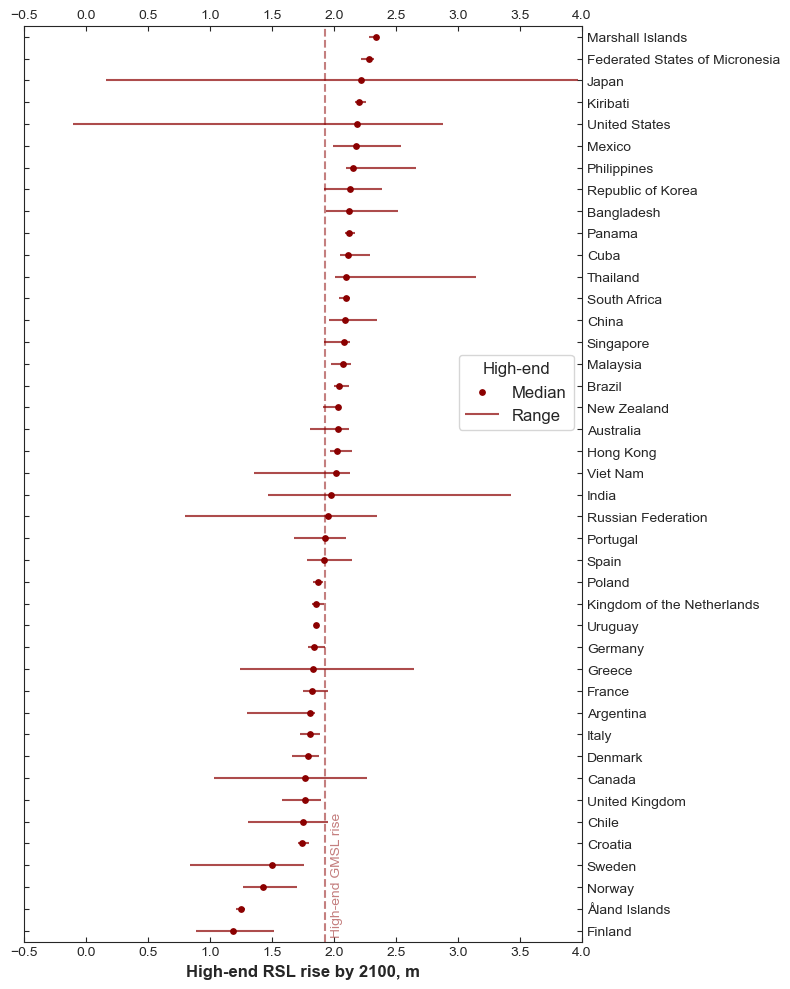

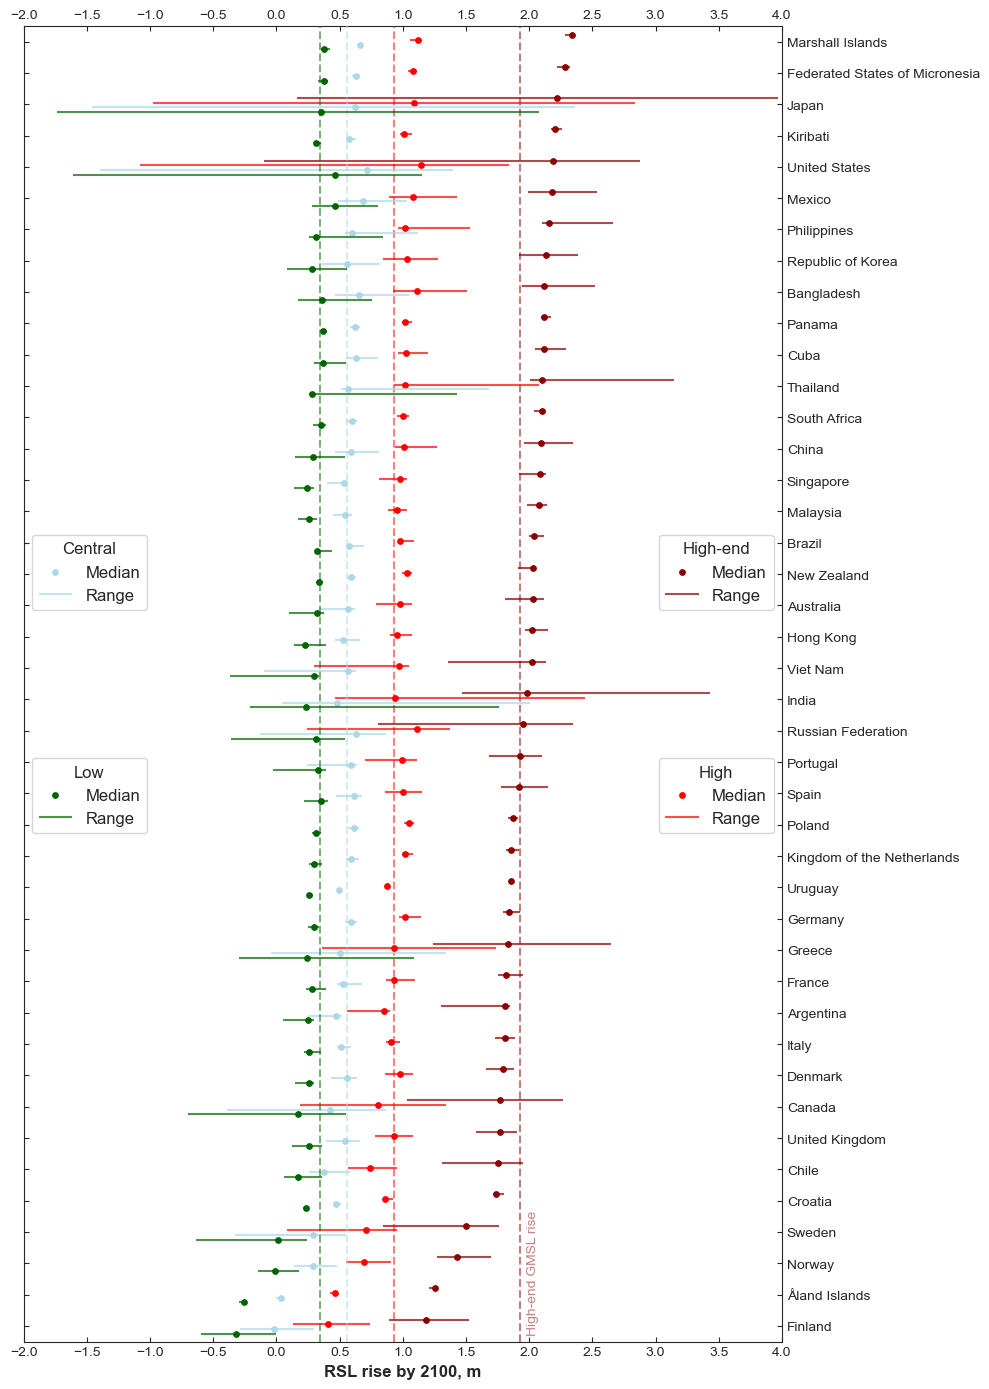

In [23]:
# Plot projections for countries
for high_end_only in (True, False):
    fig, axs = d25a.fig_country_stats(high_end_only=high_end_only)

Reading year_2100/rsl_gauges_2100_d25a.csv
Reading year_2100/novlm_gauges_2100_d25a.csv


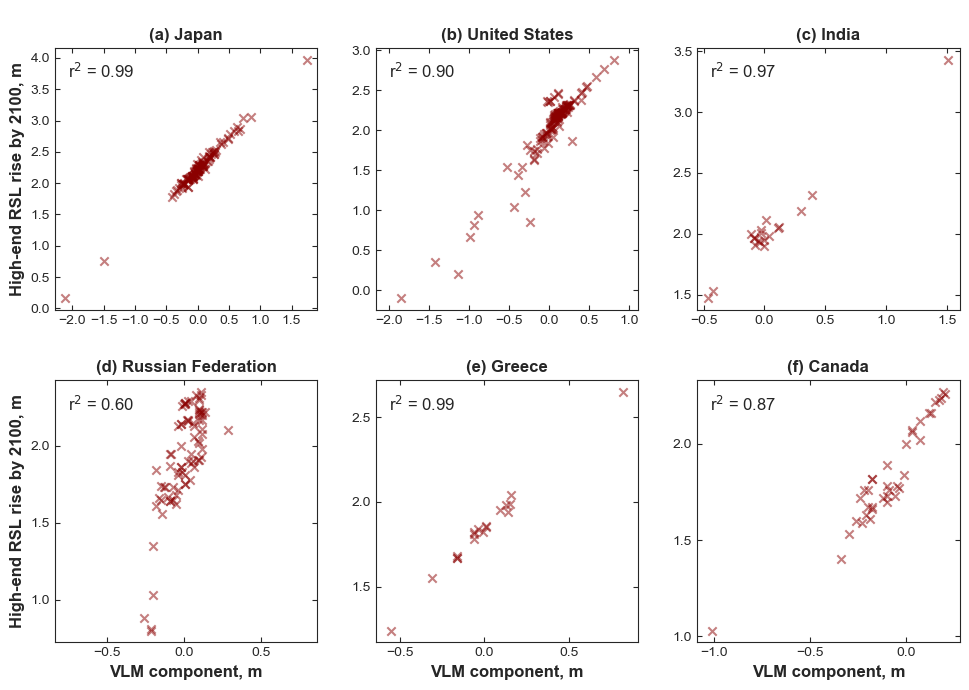

In [24]:
# RSL vs VLM within countries
fig, axs = d25a.fig_rsl_vs_vlm()

## Misc

Reading year_2100/rsl_grid_cities_2100_d25a.csv
PearsonRResult(statistic=np.float64(0.034773641498711455), pvalue=np.float64(0.304204613728118))
SignificanceResult(statistic=np.float64(0.029227783200834672), pvalue=np.float64(0.20083335082831522))


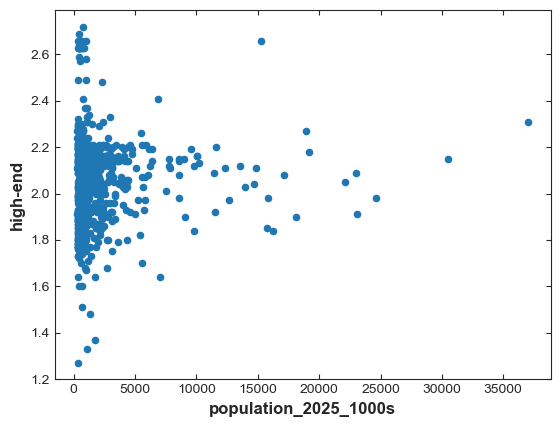

In [25]:
# Correlation between population and high-end relative SLR?
year_2100_df = d25a.read_year_2100_df(slr_str='rsl', gauges_str='grid', cities_str='cities')
year_2100_df.plot.scatter(x='population_2025_1000s', y='high-end')
print(stats.pearsonr(year_2100_df['population_2025_1000s'], year_2100_df['high-end']))
print(stats.kendalltau(year_2100_df['population_2025_1000s'], year_2100_df['high-end']))

In [26]:
! date

Thu Sep 25 15:46:37 +08 2025
